In [33]:
!pip install pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Reading the file

df=pd.read_csv("Company Stock and Investment.csv")
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [35]:
# Going ahead with only Gold Investments
# Modellling for Gold Investments only

df.drop(['Oil Investments','Comp Stock','Other sharesInvestments'], axis = 1, inplace=True)
df

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


In [36]:
# Checking columns have null values
df.isnull().sum().sort_values(ascending=False)

Gold Investments    0
Date                0
dtype: int64

In [37]:
# Convert Date object type to Datetime

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1984 non-null   datetime64[ns]
 1   Gold Investments  1984 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.1 KB


In [39]:
df.set_index('Date',inplace=True)
df.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [40]:
df.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


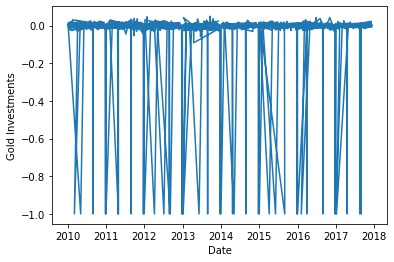

In [41]:
plt.xlabel("Date")
plt.ylabel("Gold Investments")
plt.plot(df)
#plt.figsize(20,10)
#df.plot()


In [42]:
# determining rolling statistics
rolmean=df.rolling(window=30).mean()

rolstd=df.rolling(window=30).std()
print(rolmean,rolstd)

            Gold Investments
Date                        
2009-12-31               NaN
2010-04-01               NaN
2010-05-01               NaN
2010-06-01               NaN
2010-07-01               NaN
...                      ...
2017-09-11          0.000055
2017-10-11          0.000048
2017-11-13          0.000128
2017-11-14          0.000104
2017-11-15          0.000225

[1984 rows x 1 columns]             Gold Investments
Date                        
2009-12-31               NaN
2010-04-01               NaN
2010-05-01               NaN
2010-06-01               NaN
2010-07-01               NaN
...                      ...
2017-09-11          0.005953
2017-10-11          0.005954
2017-11-13          0.005867
2017-11-14          0.005877
2017-11-15          0.005961

[1984 rows x 1 columns]


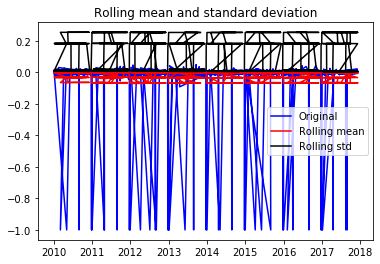

In [43]:
#Plotting rolling statistics

orig=plt.plot(df, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling mean')
std=plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [44]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [45]:
test_results=adfuller(df['Gold Investments'])

In [46]:
test_results

(-15.906853851669018,
 8.208405770369596e-29,
 7,
 1976,
 {'1%': -3.4336636717018405,
  '5%': -2.8630037919874423,
  '10%': -2.567549261922421},
 -2147.421096479902)

In [47]:
# Hypothesis testing - H1: it is stationary
def adfuller_test(stockprice):
    result=adfuller(stockprice)
    label=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,label):
        print(label+': '+str(value))
    if result[1]    <=0.05:
        print("Strong evidence against null hypotheses(Ho), reject the null hypothesis. Data is stationary...")
    else:
        print("Weak evidence against null hypotheses, Time series is non-stationary...")
    

In [48]:
adfuller_test(df['Gold Investments'])

ADF Test Statistic: -15.906853851669018
p-value: 8.208405770369596e-29
#Lags Used: 7
Number of Observations Used: 1976
Strong evidence against null hypotheses(Ho), reject the null hypothesis. Data is stationary...


In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
#model=ARIMA(df['Gold Investments'],order=(2,1,2))
model=ARIMA(df,order=(0,1,0))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1983
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 361.521
Method:                           css   S.D. of innovations              0.202
Date:                Sun, 01 Nov 2020   AIC                           -719.041
Time:                        21:27:09   BIC                           -707.857
Sample:                             1   HQIC                          -714.933
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.93e-06      0.005      0.001      0.999      -0.009       0.009
==============================================================================
"""

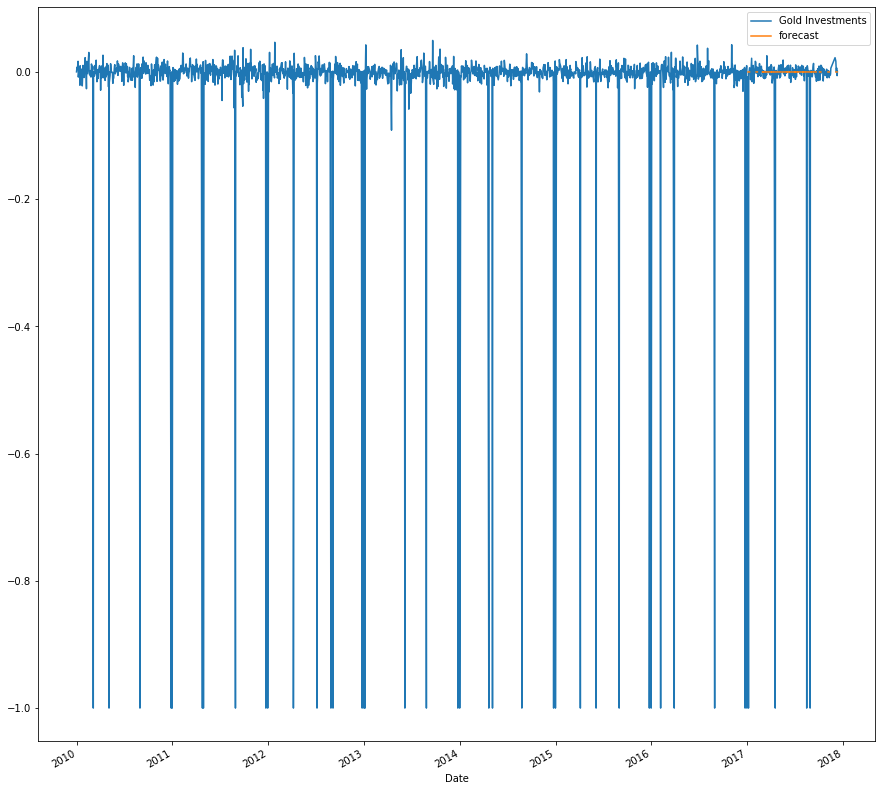

In [52]:
df['forecast']=model_fit.predict(start=1800,end=1943, dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(15,15))

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('2017-11-15 00:00:00'),
 Timestamp('2017-12-15 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-02-15 00:00:00'),
 Timestamp('2018-03-15 00:00:00'),
 Timestamp('2018-04-15 00:00:00'),
 Timestamp('2018-05-15 00:00:00'),
 Timestamp('2018-06-15 00:00:00'),
 Timestamp('2018-07-15 00:00:00'),
 Timestamp('2018-08-15 00:00:00'),
 Timestamp('2018-09-15 00:00:00'),
 Timestamp('2018-10-15 00:00:00'),
 Timestamp('2018-11-15 00:00:00'),
 Timestamp('2018-12-15 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-02-15 00:00:00'),
 Timestamp('2019-03-15 00:00:00'),
 Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-05-15 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-07-15 00:00:00'),
 Timestamp('2019-08-15 00:00:00'),
 Timestamp('2019-09-15 00:00:00'),
 Timestamp('2019-10-15 00:00:00')]

In [55]:
#import pandas as pd
future_dataset=pd.dataFrame(index=future_dates,columns=df.columns)

AttributeError: module 'pandas' has no attribute 'dataFrame'